In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

## Data Exploration

We begin with a thorough examination of the data, this will give us a better intuition of potential sources of error as well as certain traits of this dataset that will help us hone in on the right parameters

In [2]:
df = pd.read_csv("train.csv")  # importing the data
df_test = pd.read_csv("test.csv")

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
len(df[df['subject'] == 1])

347

In [5]:
df.columns.values

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [6]:
df[(df['Activity'] == "STANDING") & (df['subject'] == 1)]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,STANDING


We can see that the dataset contains roughly 300 datapoints for each subject and 50 datapoints for each activity with 6 activities in total. Each datapoint is a 563 dimensional feature vector. These data are temporally downsampled with sliding windows. From kaggle we know that there are 30 subjects, but they are separated into test and train datasets, let's check which subjets are held out for testing.

In [7]:
original = set(np.arange(1,31))  # all subjects
test_ss = set(df['subject'].value_counts().keys())  # subjects in the test dataset

In [8]:
original.difference(test_ss)

{2, 4, 9, 10, 12, 13, 18, 20, 24}

We can see that 9 subjects have been held out, leaving 21 subjects left. We know check how many datapoints are available for each subject and if there are any signficant differences.

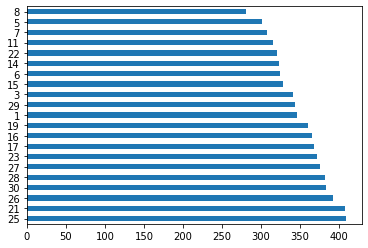

In [9]:
df['subject'].value_counts().plot.barh()

In [10]:
test_ss

{1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30}

We see that the differences of datapoints between subjects range from 50 to 100. This is worthy of keeping in mind when training on the test datasets, as the model will bias towards subjects with more data or more those with data that are easier to fit. We now check for possibility of overfitting within the six activity categories.

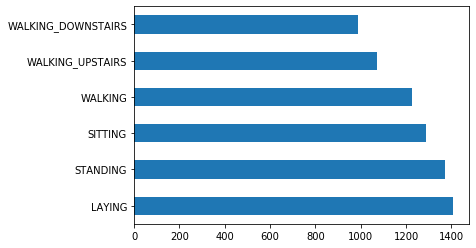

In [11]:
df['Activity'].value_counts().plot.barh();

The difference between categories range from 50 to 400. This difference is quite large and unexpected. The category "laying" has more datapoints than any of the other categories. In addition, this is summed across all subject, so different subjects might display different patterns of differences. But the dataset in general biases towards the stationary categories (Sitting, standing, and laying). If there are signs of significant overfitting, downsampling might be a way to mitigate this problem. 

We now plot the x-acceleration of the activities for a subset of subjects to visualize them and see what they look like and if certain categories are more similar than others.

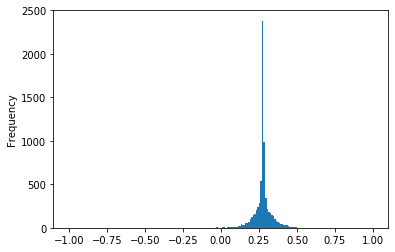

In [12]:
df['tBodyAcc-mean()-X'].plot.hist(bins = 200);

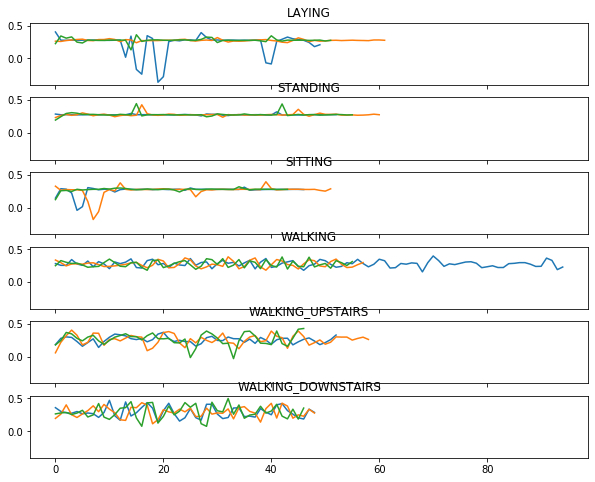

In [40]:
subs = [1, 3, 5]
activities = list(df['Activity'].value_counts().keys())
fig, axes = plt.subplots(6,1, sharex = True, sharey=True, figsize = (10,8))
for ind, activity in enumerate(activities):
        for subj in subs:
            data = df[(df['Activity'] == activity) & (df['subject'] == subj)]['tBodyAcc-mean()-X'].values
            axes[ind].plot(data)
        axes[ind].set_title(activity)
plt.savefig("Activities.png")

From the plots it's aparent that sitting & standing, and walking upstairs & downstairs are very similar, with walking and laying falling into their own category. This is, however, an early conclusions because it is only one feature. It is very difficult to visualize 563 dimensions, adn some of those are statistics such as mean and median, so we decided to perform dimensionality reduction.

## PCA

In [33]:
df2 = df[df['subject'] == 1]
color_dict = {"LAYING":'red', "STANDING":'blue', "SITTING":'green', 
              "WALKING":'orange', "WALKING_UPSTAIRS":"cyan", 
              "WALKING_DOWNSTAIRS":'magenta'}
color = [color_dict[activity] for index, activity in df2['Activity'].items()]
df_no_cat = df2.drop(columns = ['subject', 'Activity'])  #we drop the lablels

In [34]:
pca = PCA()
tr = pca.fit_transform(df_no_cat.values)

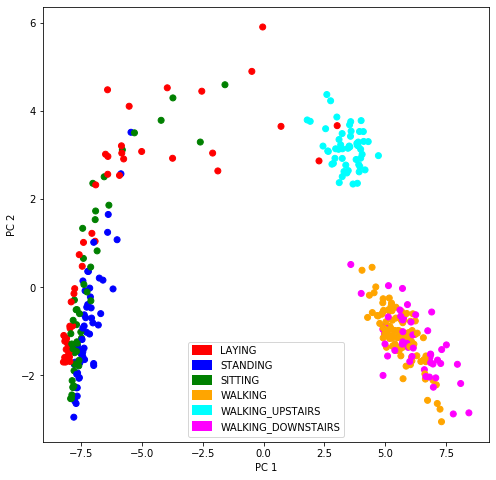

In [35]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(tr[:,0], tr[:,1], color = color);
lines = [Line2D([0], [0], color=c, linewidth=10, linestyle='--') for c in color_dict.values()]
labels = list(color_dict.keys())
ax.legend(lines, labels, loc='best');
plt.xlabel('PC 1');
plt.ylabel('PC 2');
plt.savefig('pca.png')

We can see that according to PCA, the plots separate into three clusters: Laying, Standing, and Sitting form a distinct cluster; Walking and Walking downstairs form a cluster, and walking upstairs is its own cluster. We can get futher information by looking at the proportion of explained of the principle components as well as their weightings.

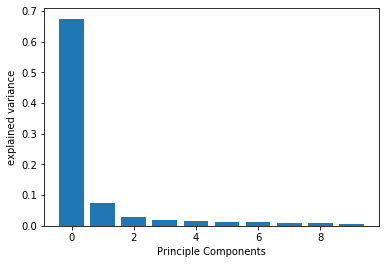

In [17]:
plt.bar(np.arange(10), pca.explained_variance_ratio_[0:10]);
plt.ylabel("explained variance");
plt.xlabel("Principle Components");
plt.savefig('explained_variance.png')

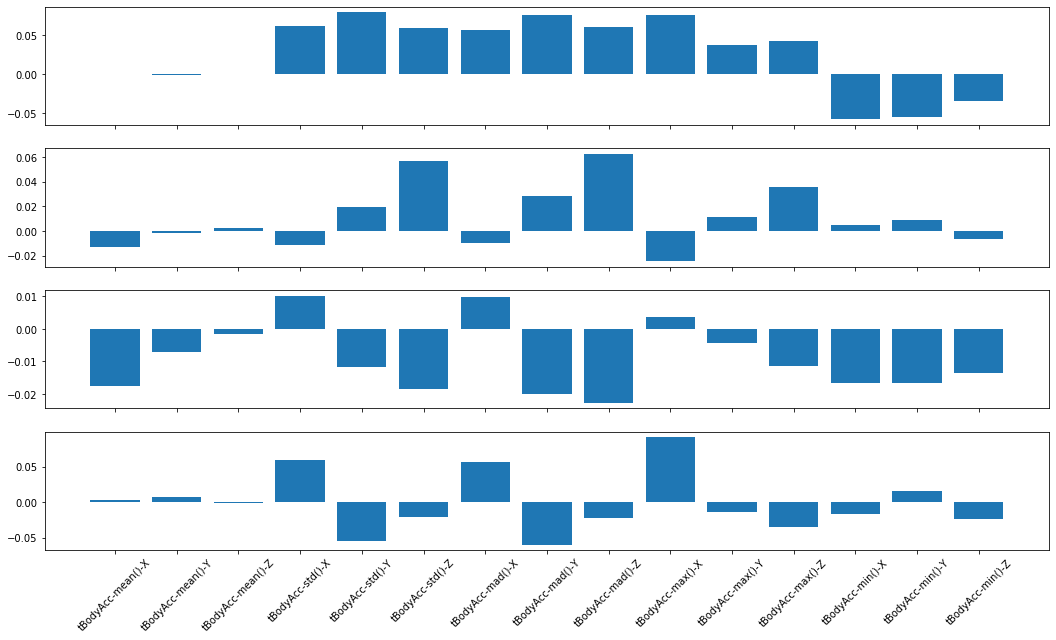

In [18]:
sub = 15
fig, axes = plt.subplots(4,1, figsize = (18,10), sharex = True)
xrange = np.arange(sub)
xlabels = list(df2.columns)[0:sub]
for i in range(4):
    axes[i].bar(xrange, pca.components_[i,0:sub])
    axes[i].set_xticks(np.arange(sub))
    axes[i].set_xticklabels(xlabels, rotation = 45)
plt.savefig('pca_weights.png')

## Support-Vector Machine with Two Categories

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from utils import *

In [20]:
df2['Activity2'] = df2.apply(convert_categories, axis = 1)

C:\Users\allen\Anaconda3\envs\vlab\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


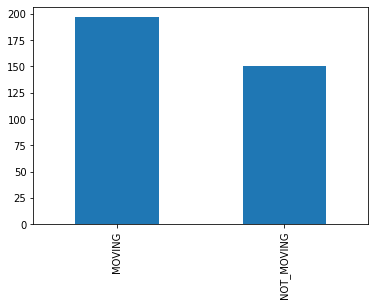

In [21]:
df2['Activity2'].value_counts().plot.bar()

We use the first 2 principle components to do a binary classification on moving vs. not moving

In [22]:
X = tr[:,0:2]
y = np.array(df2['Activity2'])
clf = SVC(C = 100, kernel = 'linear')
clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

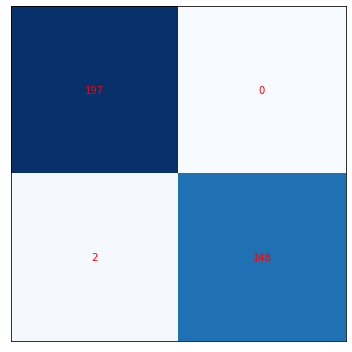

<Figure size 432x288 with 0 Axes>

In [23]:
# training accuracy
pred = clf.predict(X)
c_mat = confusion_matrix(y, pred)
plot_confusion(c_mat, 's1')

In [36]:
test = df[df['subject'] == 5].drop(columns = ['subject', 'Activity']) 
tr2 = pca.transform(test.values)
y2 = np.array(df[df['subject'] == 5].apply(convert_categories, axis = 1))

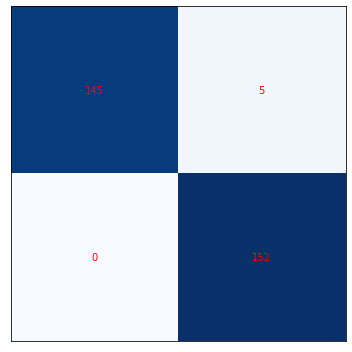

<Figure size 432x288 with 0 Axes>

In [37]:
pred2 = clf.predict(tr2[:,0:2])
plot_confusion(confusion_matrix(y2, pred2), 's2')

Let's bring back the plots and plot the decision boundary of the SVM

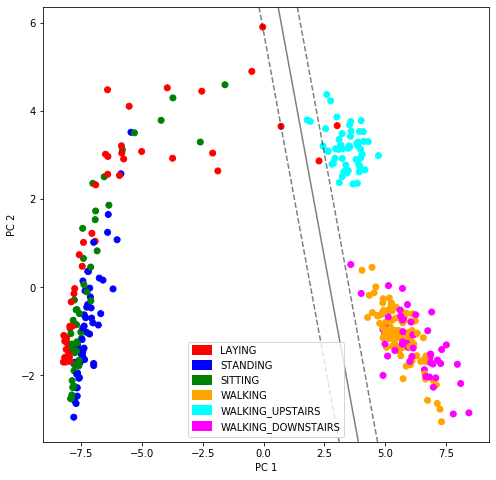

In [26]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(tr[:,0], tr[:,1], color = color);
#ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1])
plot_svc_decision_function(clf)
lines = [Line2D([0], [0], color=c, linewidth=10, linestyle='--') for c in color_dict.values()]
labels = list(color_dict.keys())
ax.legend(lines, labels, loc='best');
plt.xlabel('PC 1');
plt.ylabel('PC 2');
plt.savefig('pca.png')

In [42]:
#PCA on all subjects
pca_all = PCA()
projected = pca_all.fit_transform(drop_labels(df))

X = projected[:,0:2]
y = df.apply(convert_categories, axis = 1)
clf = SVC(C = 100, kernel = 'linear')
clf.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

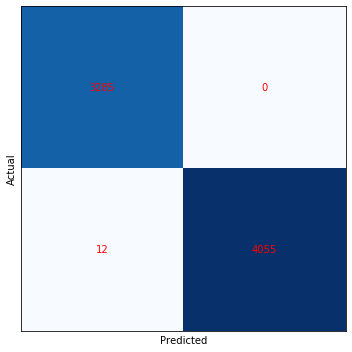

<Figure size 432x288 with 0 Axes>

In [49]:
pred = clf.predict(X)
c_mat = confusion_matrix(y, pred)
plot_confusion(c_mat, 'all')
plt.savefig('wwww.png')

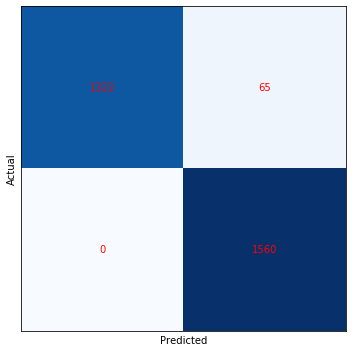

In [50]:
tr2 = pca.transform(drop_labels(df_test))
y2 = np.array(df_test.apply(convert_categories, axis = 1))
pred2 = clf.predict(tr2[:,0:2])
plot_confusion(confusion_matrix(y2, pred2), 's2')

In [71]:
#k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [72]:
kn5 = KNeighborsClassifier(n_neighbors = 5)
kn10 = KNeighborsClassifier(n_neighbors = 10)
kn15 = KNeighborsClassifier(n_neighbors = 15)

In [73]:
df2 = df[df['subject'] == 1]
X = drop_labels(df2)
y = df2['Activity']

In [74]:
X_test = drop_labels(df[df['subject'] == 5])
y_test = df[df['subject'] == 5]['Activity']

In [75]:
kn5.fit(X, y)
kn10.fit(X, y)
kn15.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

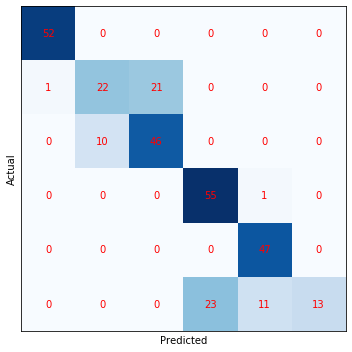

0.7781456953642384


In [147]:
pred = kn5.predict(X_test)
plot_confusion(confusion_matrix(y_test, pred), 's2')
print(kn5.score(X_test, y_test))

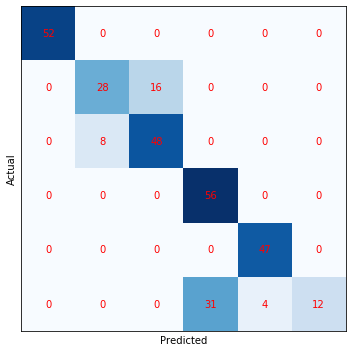

0.804635761589404


In [150]:
pred = kn10.predict(X_test)
plot_confusion(confusion_matrix(y_test, pred), 's2')
print(kn10.score(X_test, y_test))

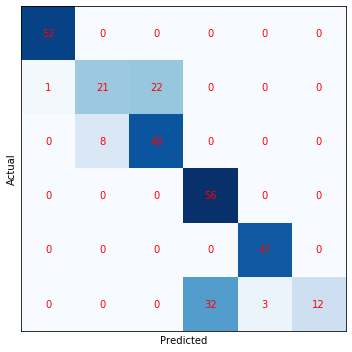

0.7814569536423841


In [152]:
pred = kn15.predict(X_test)
plot_confusion(confusion_matrix(y_test, pred), 's2')
print(kn15.score(X_test, y_test))

In [77]:
kn10.score(X, y)

0.9913544668587896

In [85]:
l = ["MOVING", "NOT_MOVING"]
plot_confusion(confusion_matrix(y2, pred2, labels = l), 's2', labels = np.unique(l))

TypeError: plot_confusion() got an unexpected keyword argument 'labels'

In [134]:
np.unique(l)

array(['MOVING', 'NOT_MOVING'], dtype='<U10')

In [135]:
len(np.unique(l))

2

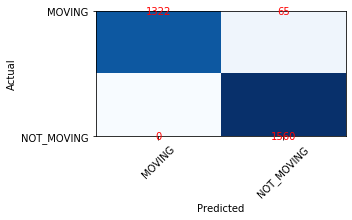

In [136]:
plot_confusion(confusion_matrix(y2, pred2, labels = l), 's2', np.unique(l))

In [115]:
np.unique(y)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)